In [14]:
# tensorflow, tf.keras 임포트
import tensorflow as tf
from tensorflow import keras

# helper 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)

#!pip freeze
#!pip list

In [ ]:
import os, sys
env_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/env1', env_path)
sys.path.insert(0, env_path)

import selenium

In [ ]:
!pip install importlib-metadata
import sys

if sys.version_info >= (3, 8):
    from importlib import metadata as importlib_metadata
else:
    import importlib_metadata

dists = importlib_metadata.distributions()
for dist in dists:
    name = dist.metadata["Name"]
    version = dist.version
    license = dist.metadata["License"]
    print(f'found distribution {name}=={version}')

wheel = importlib_metadata.distribution('pandas') 
print(wheel.metadata["Name"], 'installed')

found distribution urllib3==1.26.6
found distribution selenium==3.141.0
found distribution python-apt==0.0.0
found distribution google-colab==1.0.0
found distribution jupyter-console==5.2.0
found distribution librosa==0.8.1
found distribution gym==0.17.3
found distribution imageio==2.4.1
found distribution pydata-google-auth==1.2.0
found distribution toml==0.10.2
found distribution matplotlib==3.2.2
found distribution decorator==4.4.2
found distribution jupyter-client==5.3.5
found distribution google-resumable-media==0.4.1
found distribution pytz==2018.9
found distribution notebook==5.3.1
found distribution rpy2==3.4.5
found distribution importlib-metadata==4.5.0
found distribution cymem==2.0.5
found distribution dill==0.3.4
found distribution opt-einsum==3.3.0
found distribution atari-py==0.2.9
found distribution Pillow==7.1.2
found distribution textblob==0.15.3
found distribution argon2-cffi==20.1.0
found distribution h5py==3.1.0
found distribution typing-extensions==3.7.4.3
found di

In [16]:
# 패션 MNIST 데이터 로드
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 출력을 위해, 클래스 이름 선언
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
# 훈련 데이터 확인
train_images.shape

(60000, 28, 28)

In [18]:
len(train_images)

60000

In [19]:
train_labels
print(train_labels[0])

9


In [20]:
# 테스트 데이터 확인
test_images.shape

(10000, 28, 28)

In [21]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

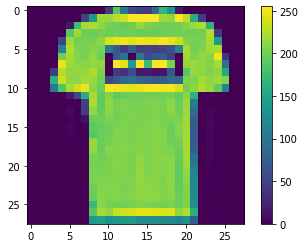

In [22]:
# 데이터 이미지 확인
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
# 데이터 전처리
train_images = train_images / 255.0

test_images = test_images / 255.0

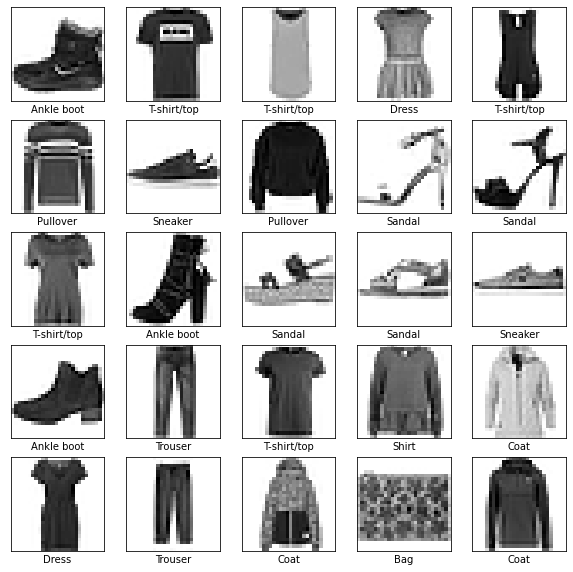

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
# 모델 설계
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# keras.layers.Flatten : 2차원 이미지 정보를 1차원 배열 변환
# keras.layers.Dense : densely-connected/fully-connected 노드(뉴런)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 125,962
Trainable params: 125,962
Non-tr

In [26]:
# 훈련 설정
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# 학습
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8193 - accuracy: 0.7143
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4938 - accuracy: 0.8250
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4401 - accuracy: 0.8424
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4068 - accuracy: 0.8541
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3832 - accuracy: 0.8615
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3652 - accuracy: 0.8669
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3497 - accuracy: 0.8729
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.8764
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3283 - accuracy: 0.8802
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.317

In [28]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3749 - accuracy: 0.8644 - 732ms/epoch - 2ms/step

테스트 정확도: 0.8644000291824341


In [29]:
#훈련된 모델활용한 예측
predictions = model.predict(test_images)

In [30]:
#예측 결과
predictions[0]

array([4.9668870e-05, 5.8550017e-05, 4.9205369e-07, 4.1595204e-06,
       2.3610885e-07, 6.6530844e-03, 1.7282233e-05, 9.2450775e-02,
       6.1330554e-04, 9.0015256e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [33]:
# 각 클래스에 대한 예측을 표시하기 위한 함수
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

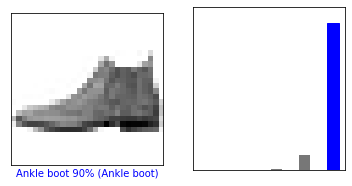

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

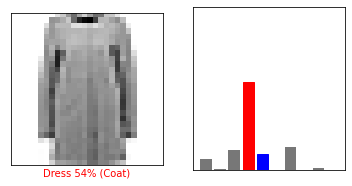

In [35]:
i = 150
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

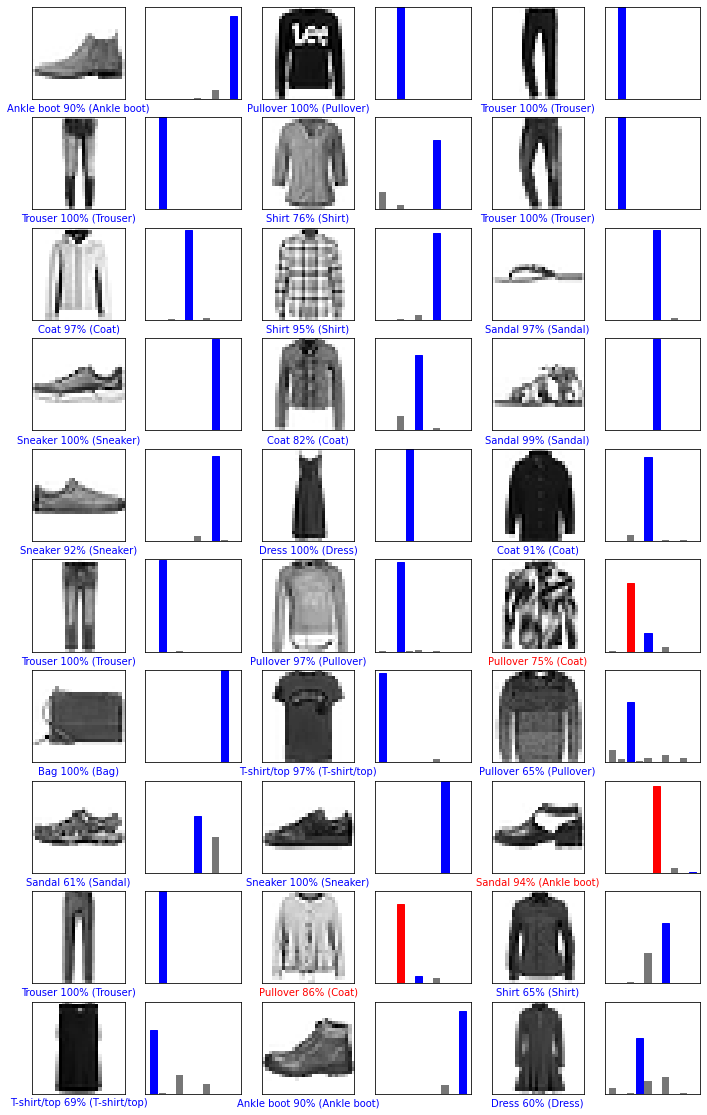

In [36]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# 이미지로 테스트
img = test_images[0]; img = (np.expand_dims(img,0))
#img = test_images[0:3]
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[0.09968743 0.09903968 0.10021878 0.09948577 0.09938171 0.09985188
  0.10010228 0.10089413 0.10028675 0.10105158]]


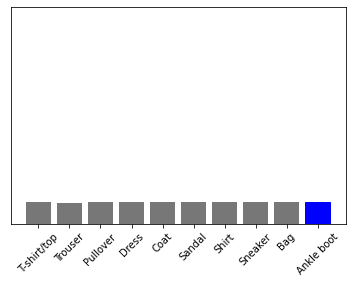

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9

In [ ]:
# CNN 모델
model2 = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #keras.layers.Conv2D(128, (3, 3), activation='relu'),
    #keras.layers.MaxPooling2D((2, 2)),
    #keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_126 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_127 (MaxPoolin (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 64)              

In [ ]:
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/cpkt/cp--{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0,
                                                 save_freq='epoch',
                                                 )  # 5번째 에포크마다 가중치를 저장

In [ ]:
# 학습과정 설정
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습 및 평가
train_images2 = train_images.reshape((60000, 28, 28, 1))
test_images2 = test_images.reshape((10000, 28, 28, 1))
#train_images, test_images = train_images / 255.0, test_images / 255.0


history = model2.fit(train_images2, train_labels, epochs=10, validation_split=0.2, callbacks=[cp_callback])
#model.evaluate(test_images, test_labels)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.9069 - val_accuracy: 0.8863
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.9977 - val_accuracy: 0.8859
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.9735 - val_accuracy: 0.8857
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.9311 - val_accuracy: 0.8906
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0273 - accuracy: 0.9905 - val_loss: 0.9699 - val_accuracy: 0.8863
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0251 - accuracy: 0.9913 - val_loss: 0.9600 - val_accuracy: 0.8877
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0254 - accuracy: 0.9911 - val_loss: 0.9154 - val_accuracy:

In [ ]:
model2.load_weights('/content/drive/MyDrive/Colab Notebooks/cpkt/cp--0001.ckpt')

# 정확도 평가
test_loss, test_acc = model2.evaluate(test_images2,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.9787 - accuracy: 0.8807

테스트 정확도: 0.8806999921798706


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

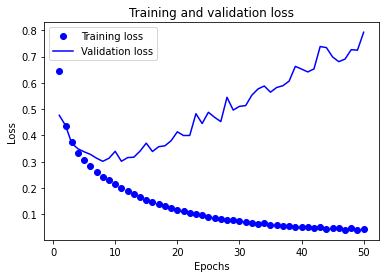

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# bo: 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss')
# b : 파란 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

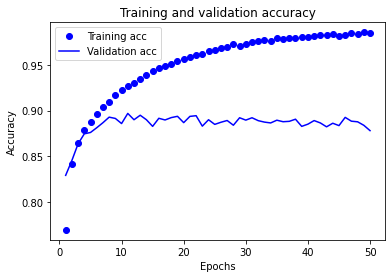

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()